In [1]:
!pip install tensorflow==2.16.1


  Using cached tensorflow-2.16.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
Using cached tensorflow-2.16.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.9 MB)


In [4]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Mapping of label numbers to class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Pick one example (say the first)
index = 0
image = x_train[index]
label = y_train[index]

print(f"Image shape: {image.shape}")
print(f"Label (integer): {label}")
print(f"Label (name): {class_names[label]}")


# show the full image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {class_names[label]} ({label})")
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

#Base

# 1) normalize pixels to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# 2) convert labels to one-hot vectors
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

# 3) build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),        # 28x28 → 784
    Dense(128, activation='relu'),        # hidden layer with ReLU
    Dense(10, activation='softmax')       # 10 output classes
])

# 4) compile (choose optimizer, loss, metrics)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5) train
history = model.fit(
    x_train, y_train_cat,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# 6) evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")


ModuleNotFoundError: No module named 'tensorflow'

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# reshape data for CNN: add a channel dimension (grayscale = 1)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn  = x_test.reshape(-1, 28, 28, 1)

# build CNN model
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),                     # helps prevent overfitting
    Dense(10, activation='softmax')
])

# compile model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# train model
history_cnn = cnn.fit(
    x_train_cnn, y_train_cat,
    epochs=10,                 # was 5
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


# evaluate
test_loss_cnn, test_acc_cnn = cnn.evaluate(x_test_cnn, y_test_cat, verbose=0)
print(f"Test accuracy (CNN): {test_acc_cnn:.3f}")


/opt/conda/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.7824 - loss: 0.6057 - val_accuracy: 0.8600 - val_loss: 0.3768
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.8565 - loss: 0.4010 - val_accuracy: 0.8813 - val_loss: 0.3217
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8742 - loss: 0.3472 - val_accuracy: 0.8935 - val_loss: 0.2866
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.8857 - loss: 0.3130 - val_accuracy: 0.8958 - val_loss: 0.2807
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8942 - loss: 0.2912 - val_accuracy: 0.8990 - val_loss: 0.2732
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8989 - loss: 0.2723 - val_accuracy: 0.9032 - val_loss: 0.2531
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9059 - loss: 0.2563 - val_accuracy: 0.9097 - val_loss: 0.2489
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9104 - loss: 0.2437 - 

NameError: name 'history_cnn' is not defined

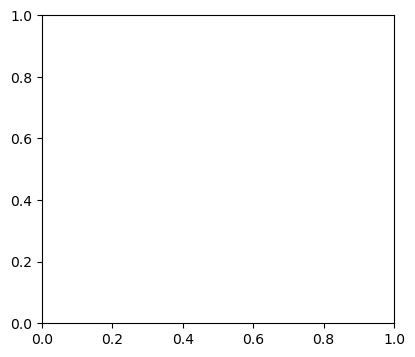

In [8]:
#  Plot training history 
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
#Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

pred_labels = np.argmax(cnn.predict(x_test_cnn), axis=1)
cm = confusion_matrix(y_test, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - CNN Model")
plt.show()


NameError: name 'cnn' is not defined

In [7]:
import numpy as np

# Predict on test set
predictions = cnn.predict(x_test_cnn)
predicted_labels = np.argmax(predictions, axis=1)

# Show 12 random test images with predictions
plt.figure(figsize=(12,6))
for i, idx in enumerate(np.random.choice(len(x_test_cnn), 12)):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test_cnn[idx].reshape(28,28), cmap='gray')
    true_label = class_names[y_test[idx]]
    pred_label = class_names[predicted_labels[idx]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"P: {pred_label}\nT: {true_label}", color=color, fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()


NameError: name 'cnn' is not defined